# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [53]:
data = pd.io.stata.read_stata('/users/hp/desktop/Ds-springboard/mini_project/racial/EDA_racial_discrimination/data/us_job_market_discrimination.dta')



In [54]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [55]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,
1,b,1,3,3,6,0,1,1,0,316,...,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,
2,b,1,4,1,6,0,0,0,0,19,...,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,
3,b,1,3,4,6,0,1,0,1,313,...,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,
4,b,1,3,3,22,0,0,0,0,313,...,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,Nonprofit


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

# What test is appropriate for this problem? Does CLT apply?

As the variables are categorical we'll use hypothesis test for comparing two proportions.

1. Does CLT apply?
2. What are the null and alternate hypotheses?


In [57]:
# data containing white and black applicants
w = data[data.race=='w']
b = data[data.race=='b']

In [58]:
# white applicants
n_w = len(w)
print('Total white applicants: ', n_w)
c_w = w.call.sum()
print('Number of callbacks for white applicants: ',c_w)
p_w = c_w/n_w
print('Percent of callbacks for white applicants: %.4f' % p_w)


Total white applicants:  2435
Number of callbacks for white applicants:  235.0
Percent of callbacks for white applicants: 0.0965


In [59]:
# black applicants
n_b = len(b)
print('Total black applicants: ', n_b)
c_b = b.call.sum()
print('Number of callbacks for black applicants: ',c_b)
p_b = c_b/n_b
print('Percent of callbacks for black applicants: %.4f' % p_b)


Total black applicants:  2435
Number of callbacks for black applicants:  157.0
Percent of callbacks for black applicants: 0.0645


(0, 4)

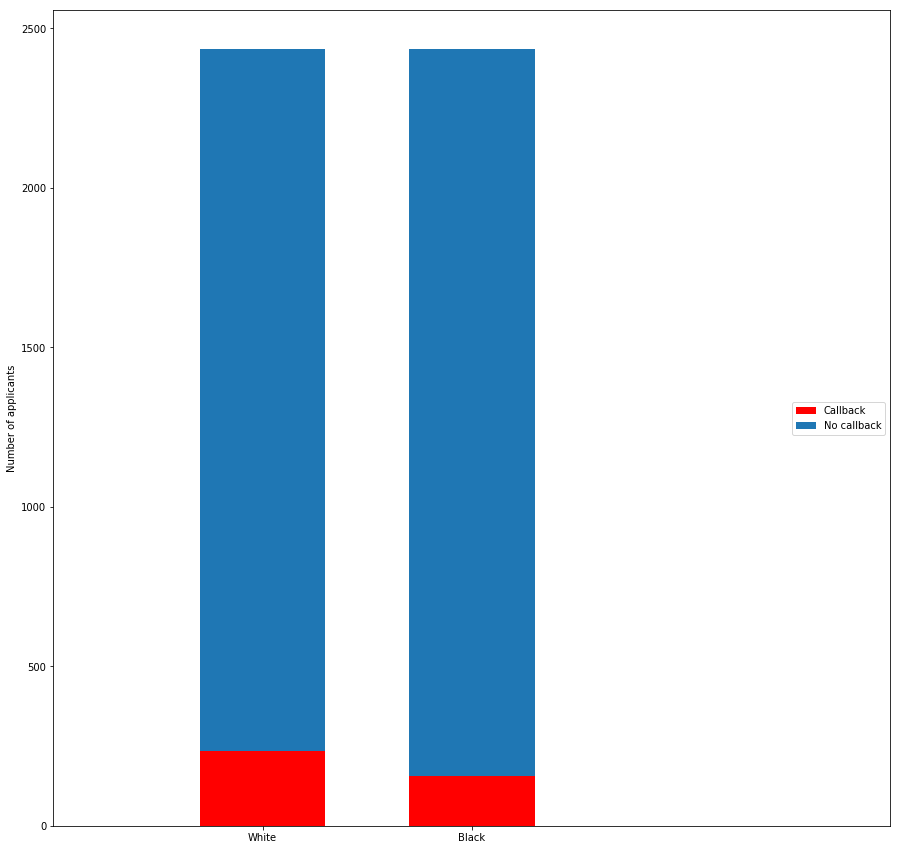

In [60]:

#plotting number of call back an no no call back for whites and black candidates
ind = [1,2]
f1 = plt.bar(ind,[c_w,c_b],width=0.6,color='red',align='center')
f2 = plt.bar(ind,[n_w-c_w,n_b-c_b],width=0.6,bottom=[c_w,c_b],align='center')
plt.xticks(ind,['White','Black'])
plt.ylabel('Number of applicants')
plt.legend((f1[0],f2[0]),('Callback','No callback'),loc=5)
plt.xlim([0,4])


1. What test is appropriate for this problem? Does CLT apply?

    This problem is related to compare two population proportion (white and black applicants). The objective is to determine whether race has a significant impact on the rate of callbacks for resumes.

    The CLT can apply in this case (samples must be randomly selected). Sample size is larger than 30, so z-statistics is more suitable than t-statistics.



2. What are the null and alternate hypotheses?

    Ho: There is no difference between black and white resumes/ There is no significant difference between "percentage called back" for black and white resumes. 

    H1: There is difference between black and white resumes/ There is significant difference between "percentage called back" for black and white resumes. 

    H0: pw = pb

    H1: pw $\neq$ pb
    
    Sample size>=30 so z-statistic is appropriate


# Compute margin of error, confidence interval, and p-value.

## Bootstrapping method

In [61]:
np.random.seed(1)

# Number of bootstrap samples (N)
N = 10000

# percent callbacks for white in bootstrapping
w_bs = np.empty(N)
# percent callbacks for black in bootstrapping
b_bs = np.empty(N)
# difference of percent callbacks between whites and blacks
diff_bs = np.empty(N)

In [62]:
w_bs

array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
# generate bootstraps
for i in range(N):    
    w_bs[i] = np.sum(np.random.choice(data.call,size=n_w))/n_w
    b_bs[i] = np.sum(np.random.choice(data.call,size=n_b))/n_b
    diff_bs[i] = w_bs[i] - b_bs[i]

/Users/hp/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Bootstrapping approach')

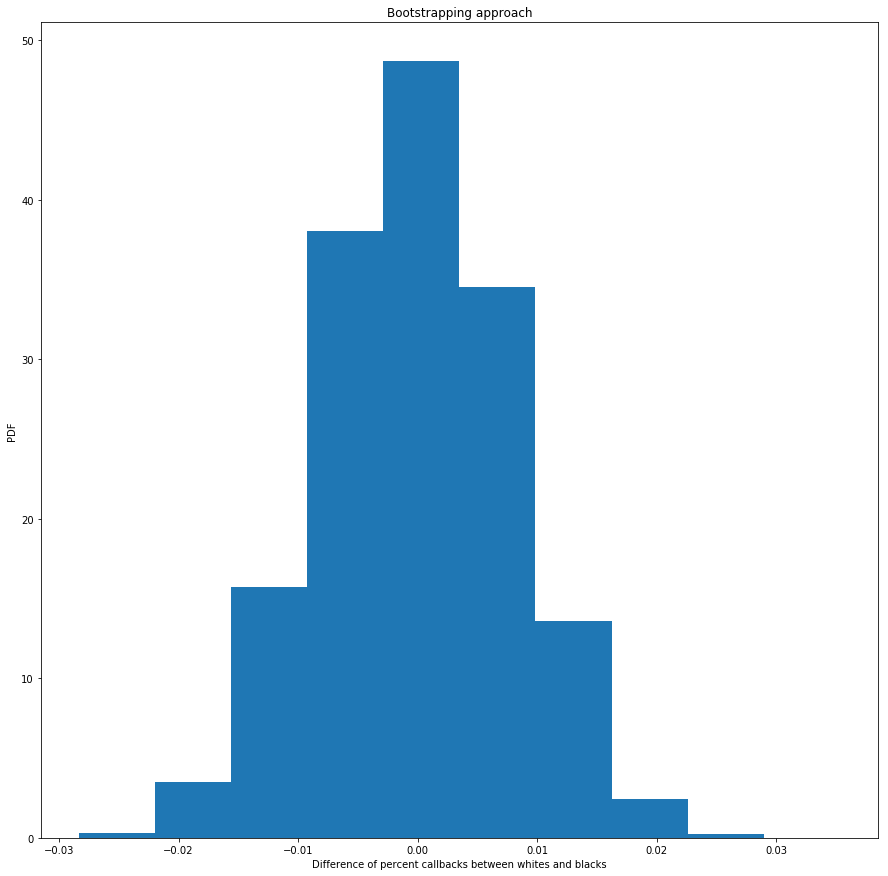

In [64]:
_ = plt.hist(diff_bs,normed=True)
plt.xlabel('Difference of percent callbacks between whites and blacks')
plt.ylabel('PDF')
plt.title('Bootstrapping approach')

In [65]:
print('alpha = 0.05')
alpha = 0.05

# Print the p-value
p_value_bs = np.sum(diff_bs >= (p_w-p_b))/len(diff_bs)
print('p-value = %.4f' % p_value_bs)

if p_value_bs < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')


alpha = 0.05
p-value = 0.0001
Ho can be rejected


In [66]:
ci_bs = np.percentile(diff_bs,[2.5, 97.5])
me_bs = 0.5*(ci_bs[1]-ci_bs[0])

print('The margin of error : ', me_bs)
print('Confidence interval : ', ci_bs)


The margin of error :  0.015400410677618069
Confidence interval :  [-0.01560575  0.01519507]


## Frequentist statistical method

In [67]:
# whites 
# total applicants (n1) and percent of callbacks (p1)
# variance (var1)
var_1 = p_w*(1-p_w)/n_w

# blacks
# total applicants (n2) and percent of callbacks (p2)
# variance (var2)
var_2 = p_b*(1-p_b)/n_b

# difference in callback percent 
diff_fre = p_w-p_b

# standard error
diff_std = np.sqrt(var_1 + var_2)

In [68]:
# use z-statistics
z_score = diff_fre/diff_std
print('z-score : ',z_score)

# p_value (2 tails)
p_value = (1-stats.norm.cdf(z_score))*2
print('p-value : ', p_value)

# significance level (alpha = 0.05)
if p_value < alpha:
    print('Ho can be rejected')
else:
    print('Ho cannot be rejected')


z-score :  4.11555043573
p-value :  3.862565207524149e-05
Ho can be rejected


In [69]:
# margin of error
# the critical Z-score values when using a 95% confidence level is 1.96
me = 1.96 * diff_std
print('The margin of error : ', me)

# confidence interval
ci = [diff_fre - me, diff_fre + me]
print('Confidence interval : ', ci)


The margin of error :  0.015255406349886438
Confidence interval :  [0.016777447859559147, 0.047288260559332024]


# Write a story describing the statistical significance in the context or the original problem.



Based on statistical tests from bootstrapping and frequentist statistical methods, p value are less than 0.05 with 95% confidence interval. Therefore, null hypothesis can be rejected which means there is a significant difference between rate callbacks for resume between white and black candidates. White applicants have higher chance of getting callbacks for resumes compared to black candidates.

# Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?


No, it does not. Analyses show that one of the influencing factor is  race for callback success. It does not explicitly say this is the most important factor for callback success.

Based on our data, we need to find the correlation between callback and other factors. We will find it based on correlation plot.

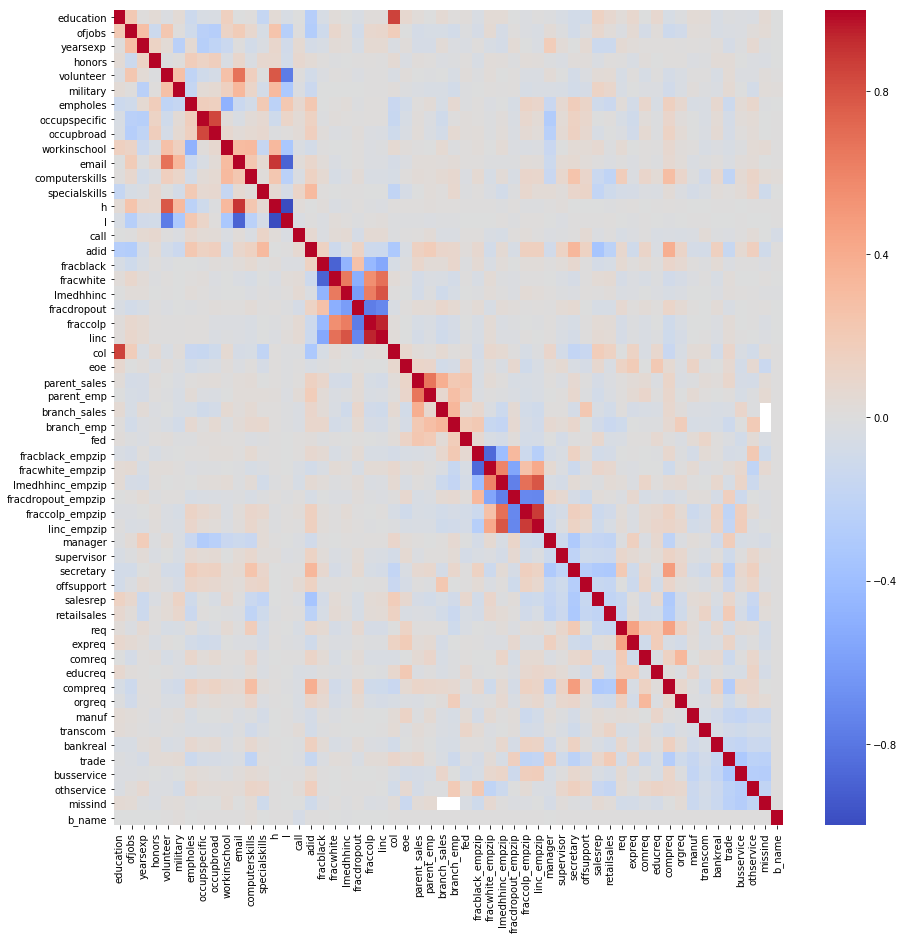

,b_name,call
b_name,1.00000,-0.05887
fracdropout,-0.00432,-0.05667
lmedhhinc_empzip,0.00000,-0.04988
req,-0.00000,-0.04170
educreq,0.00000,-0.03386
orgreq,-0.00000,-0.03342
fracwhite_empzip,0.00000,-0.03299
branch_sales,0.00000,-0.02913
computerskills,0.03104,-0.02881
manuf,-0.00000,-0.02879


In [70]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,15)
# calculate the correlation matrix
df_corr = data
df_corr['b_name'] = 0
df_corr.loc[data.race == 'b','b_name'] = 1

corr = df_corr.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')
plt.show()

pd.options.display.float_format = '{:.5f}'.format
corr[['b_name', 'call']].sort_values('call')


Above correlation plot shows strong negative correlation between name and callbacks.